<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/CARDEKHO_com_EDA_%26_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [179]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [180]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [182]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# Exploratory Data Analysis

In [183]:
df.corr()['selling_price']

<ipython-input-183-c0ea742623df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['selling_price']


year             0.413922
selling_price    1.000000
km_driven       -0.192289
Name: selling_price, dtype: float64

<Axes: xlabel='fuel', ylabel='count'>

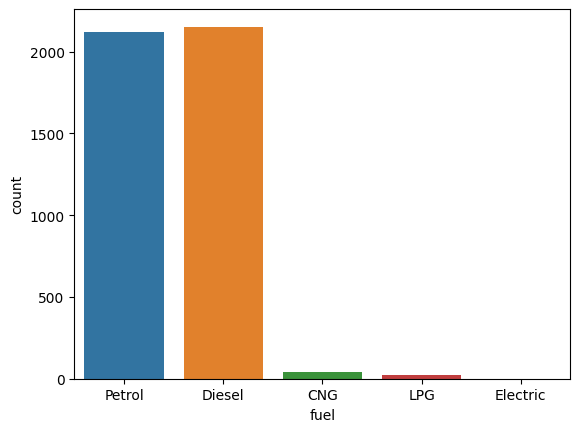

In [184]:
sns.countplot(x = df['fuel'])

<Axes: xlabel='seller_type', ylabel='count'>

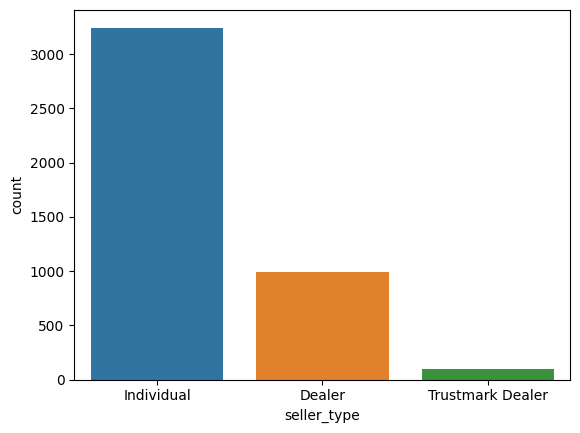

In [185]:
sns.countplot(x = df['seller_type'])

<Axes: xlabel='transmission', ylabel='count'>

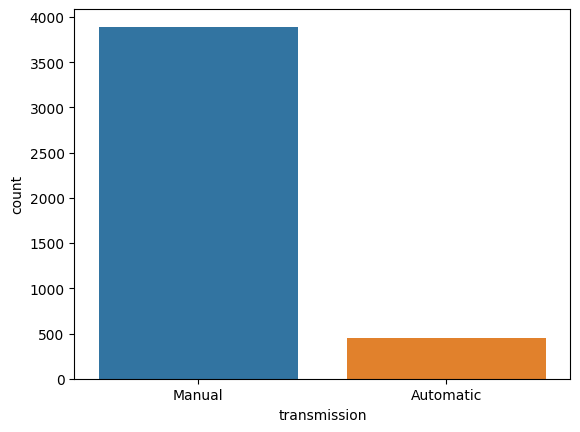

In [186]:
sns.countplot(x = df['transmission'])

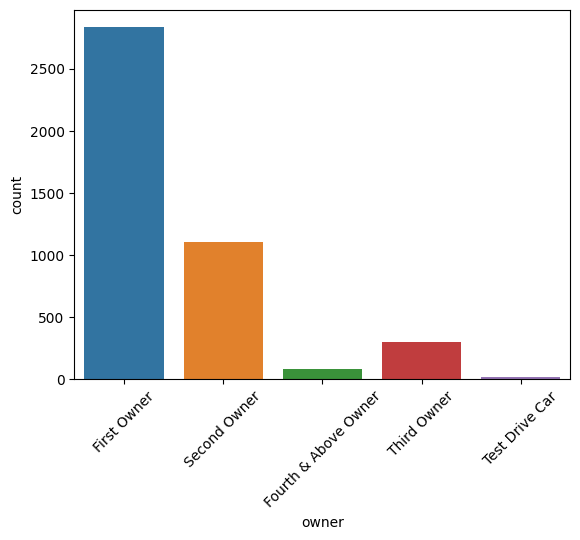

In [187]:
sns.countplot(x = df['owner'])
plt.xticks(rotation = 45)
plt.show()

<Axes: ylabel='owner'>

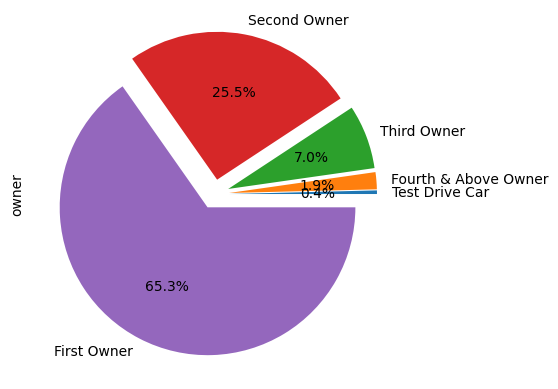

In [188]:
df['owner'].value_counts().sort_values().plot.pie(explode = (0.1, 0.1, 0.1, 0.1, 0.1) , autopct='%1.1f%%')

In [189]:
df['first_name'] = df['name'].str.split(' ').str[0]

<Axes: >

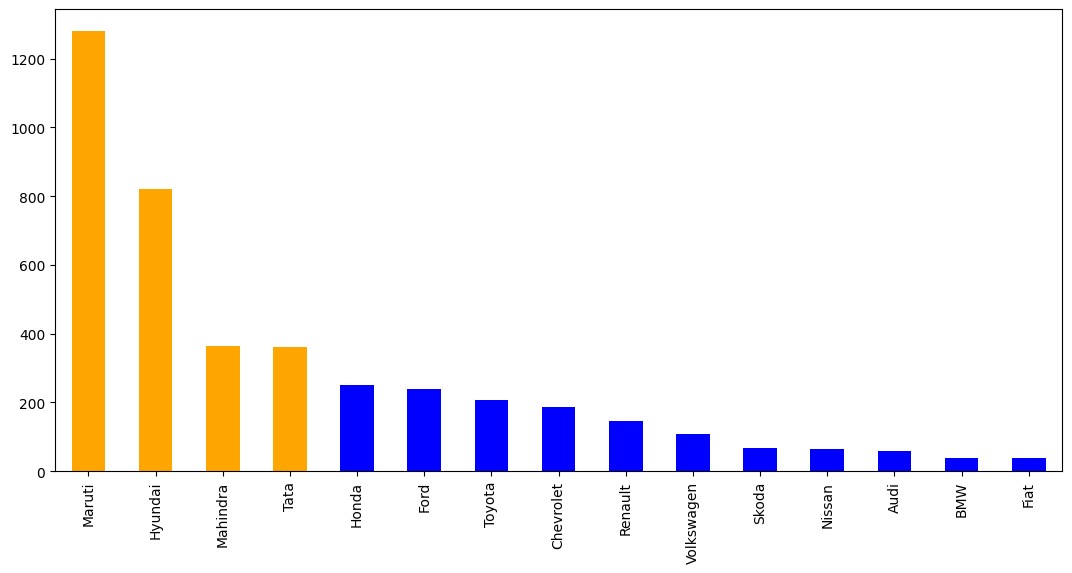

In [190]:
plt.figure(figsize = (13,6))
df['first_name'].value_counts().head(15).plot.bar(color=['orange' if val > 300 else 'blue' for val in df['first_name'].value_counts().values])

<Axes: >

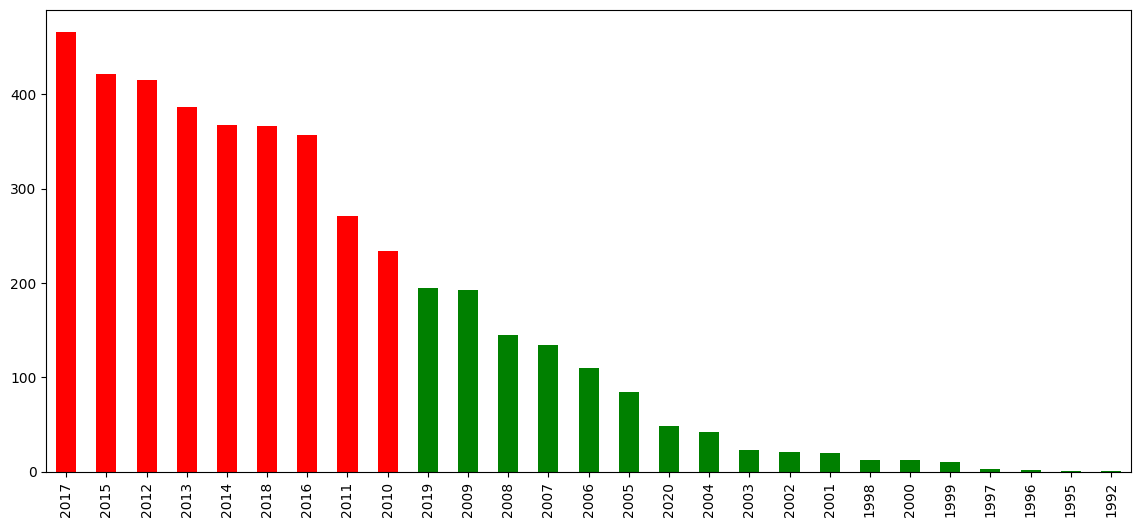

In [191]:
plt.figure(figsize = (14,6))
df['year'].value_counts().plot.bar(color = ['red' if val > 200 else 'green' for val in df['year'].value_counts().values])

# Data Cleaning

In [192]:
Fuel = pd.get_dummies(df['fuel'] , drop_first = True)

In [193]:
Seller = pd.get_dummies(df['seller_type'], drop_first = True)

In [194]:
Transmission = pd.get_dummies(df['transmission'], drop_first = True)

In [195]:
Owner = pd.get_dummies(df['owner'], drop_first = True)

In [196]:
df = pd.concat([df, Fuel, Seller, Transmission, Owner], axis = 1)

In [197]:
df.drop(['fuel', 'seller_type', 'transmission', 'owner' , 'name', 'first_name'] , axis = 1, inplace = True)

In [198]:
df.corr()['selling_price']

year                    0.413922
selling_price           1.000000
km_driven              -0.192289
Diesel                  0.282947
Electric               -0.005095
LPG                    -0.042434
Petrol                 -0.269453
Individual             -0.236798
Trustmark Dealer        0.110176
Manual                 -0.530205
Fourth & Above Owner   -0.078725
Second Owner           -0.161986
Test Drive Car          0.048799
Third Owner            -0.111326
Name: selling_price, dtype: float64

In [199]:
X = df.drop(['selling_price'] , axis = 1)
y = df['selling_price']

In [200]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print('R2_Score is ', r2_score(y_test, y_pred)*100)

R2_Score is  37.842910343462364


In [203]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('R2_Score is ', r2_score(y_test, y_pred)*100)

R2_Score is  35.53397453199351


In [204]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('R2_Score is ', r2_score(y_test, y_pred)*100)

R2_Score is  54.083810860390955


In [205]:
df.corr()['selling_price']

year                    0.413922
selling_price           1.000000
km_driven              -0.192289
Diesel                  0.282947
Electric               -0.005095
LPG                    -0.042434
Petrol                 -0.269453
Individual             -0.236798
Trustmark Dealer        0.110176
Manual                 -0.530205
Fourth & Above Owner   -0.078725
Second Owner           -0.161986
Test Drive Car          0.048799
Third Owner            -0.111326
Name: selling_price, dtype: float64

In [206]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'Diesel', 'Electric', 'LPG',
       'Petrol', 'Individual', 'Trustmark Dealer', 'Manual',
       'Fourth & Above Owner', 'Second Owner', 'Test Drive Car',
       'Third Owner'],
      dtype='object')

In [207]:
X1 = df[['year','Diesel','Trustmark Dealer', 'Test Drive Car','km_driven', 'LPG', 'Petrol', 'Fourth & Above Owner','Second Owner' ]]
y1 = df['selling_price']

In [208]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3)

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [210]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X1_train, y1_train)
y1_pred = rf.predict(X1_test)
print('R2_Score is ', r2_score(y1_test, y1_pred)*100)

R2_Score is  37.845624857211725


In [211]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [231]:
model = Sequential()
model.add(Dense(units = 72, activation = 'relu', input_dim = 9))
model.add(Dense(units = 72, activation = 'relu'))
model.add(Dense(units = 18, activation = 'relu'))
model.add(Dense(units = 9, activation = 'relu'))
model.add(Dense(units = 1))

In [232]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

In [235]:
model.fit(X1_train, y1_train, epochs=100, batch_size=100)

Epoch 1/100
31/31 [==============================] - 0s 5ms/step - loss: 210514.4531 - accuracy: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 210530.6094 - accuracy: 0.0000e+00
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 210488.3125 - accuracy: 0.0000e+00
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 210485.2500 - accuracy: 0.0000e+00
Epoch 5/100
31/31 [==============================] - 0s 6ms/step - loss: 210501.9375 - accuracy: 0.0000e+00
Epoch 6/100
31/31 [==============================] - 0s 7ms/step - loss: 210466.7812 - accuracy: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 0s 7ms/step - loss: 210441.0625 - accuracy: 0.0000e+00
Epoch 8/100
31/31 [==============================] - 0s 7ms/step - loss: 210447.3750 - accuracy: 0.0000e+00
Epoch 9/100
31/31 [==============================] - 0s 7ms/step - loss: 210425.0312 - accuracy: 0.0000e+00
Epoch 10/100
31/31 [========

In [236]:
y1_pred = model.predict(X1_test)
print('R2_Score is ', r2_score(y1_test, y1_pred)*100)

41/41 [==============================] - 0s 1ms/step
R2_Score is  25.801437098001923
